**CHALLENGE**
1. Gunakan data customer_churn.csv dari modul sebelumnya.
2. Tentukan best K dari KNN
3. Tentukan Kombinasi Criterion dan Max Depth dan Min Sample Split Terbaik di DT
4. Tentunkan kernel terbaik dari SVM
5. Tentukan solver terbaik dari Logistic Regression
6. Dari semua parameter terbaik diatas, model manakah yang paling cocok untuk di deploy?
7. Jika DT yang terbaik, feature mana yang memberikan pengaruh paling signifikan?

In [55]:
!pip install gdown

In [56]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Download data dari Google Drive
file_id = '1KEV6u_Ud2BOtcUH04MgtsVQuPxP56rXF'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'customer_churn.csv'

print('Downloading data dari Google Drive...')
gdown.download(url, output, quiet=False)
print('Download selesai!\n')

# Load data
df = pd.read_csv('customer_churn.csv')
print("Data shape:", df.shape)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1KEV6u_Ud2BOtcUH04MgtsVQuPxP56rXF
To: d:\Purwadhika\Modul 3\Latihan Soal\customer_churn.csv
100%|██████████| 63.3k/63.3k [00:00<00:00, 2.13MB/s]

Download selesai!

Data shape: (1500, 8)


,Tenure,Total_Belanja_3bln,Hari_Terakhir_Login,Sesi_Per_Bulan,Jumlah_Tiket_Komplain,Skor_Kepuasan,Item_Wishlist,Churn
0,34.10,18.57,31.45,67.04,5.89,4.98,18.64,1
1,53.14,33.17,47.51,59.71,8.17,3.57,7.24,0
2,42.23,30.98,45.80,46.99,6.49,5.50,18.05,0
3,30.78,27.27,47.73,60.87,7.11,5.28,14.68,0
4,33.43,14.50,42.93,51.55,7.43,5.55,24.38,1


In [57]:
# Cek info dataset
print(df.info())
print("\nCek missing values:")
print(df.isnull().sum())
print("\nCek distribusi target:")
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tenure                 1500 non-null   float64
 1   Total_Belanja_3bln     1500 non-null   float64
 2   Hari_Terakhir_Login    1500 non-null   float64
 3   Sesi_Per_Bulan         1500 non-null   float64
 4   Jumlah_Tiket_Komplain  1500 non-null   float64
 5   Skor_Kepuasan          1500 non-null   float64
 6   Item_Wishlist          1500 non-null   float64
 7   Churn                  1500 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 93.9 KB
None

Cek missing values:
Tenure                   0
Total_Belanja_3bln       0
Hari_Terakhir_Login      0
Sesi_Per_Bulan           0
Jumlah_Tiket_Komplain    0
Skor_Kepuasan            0
Item_Wishlist            0
Churn                    0
dtype: int64

Cek distribusi target:
Churn
0    751
1    749
Name: count, dtype: 

In [58]:
# Pisahkan feature dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data (penting untuk KNN dan SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (1200, 7)
Data testing: (300, 7)


## 2. Cari Best K untuk KNN

In [59]:
# Cari K terbaik untuk KNN
print('Mencari K terbaik untuk KNN...')
k_values = range(1, 51, 2)  # Test K ganjil aja biar ga seri
acc_list = []
best_k = 0
best_score = 0

for k in k_values:
    # Bikin model KNN dengan K = k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Latih model
    knn.fit(X_train_scaled, y_train)
    
    # Prediksi
    pred_knn = knn.predict(X_test_scaled)
    
    # Hitung akurasi
    acc = accuracy_score(y_test, pred_knn)
    acc_list.append(acc)
    
    print(f'K={k}, Akurasi = {round(acc*100, 2)}%')
    
    # Cek apakah ini akurasi terbaik
    if acc > best_score:
        best_score = acc
        best_k = k

print(f'\n✅ K terbaik adalah K={best_k} dengan akurasi {round(best_score*100, 2)}%')

# Final Model KNN dengan K terbaik
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
pred_knn_final = knn_final.predict(X_test_scaled)
best_knn_score = accuracy_score(y_test, pred_knn_final)

print(f'\nAkurasi Final KNN (K={best_k}): {round(best_knn_score*100, 2)}%')

Mencari K terbaik untuk KNN...
K=1, Akurasi = 87.67%
K=3, Akurasi = 90.33%
K=5, Akurasi = 89.0%
K=7, Akurasi = 90.0%
K=9, Akurasi = 91.0%
K=11, Akurasi = 90.67%
K=13, Akurasi = 91.0%
K=15, Akurasi = 92.0%
K=17, Akurasi = 91.0%
K=19, Akurasi = 91.33%
K=21, Akurasi = 91.33%
K=23, Akurasi = 90.0%
K=19, Akurasi = 91.33%
K=21, Akurasi = 91.33%
K=23, Akurasi = 90.0%
K=25, Akurasi = 90.67%
K=27, Akurasi = 90.67%
K=29, Akurasi = 91.0%
K=31, Akurasi = 91.0%
K=33, Akurasi = 91.33%
K=35, Akurasi = 91.0%
K=37, Akurasi = 91.33%
K=39, Akurasi = 91.0%
K=41, Akurasi = 90.33%
K=25, Akurasi = 90.67%
K=27, Akurasi = 90.67%
K=29, Akurasi = 91.0%
K=31, Akurasi = 91.0%
K=33, Akurasi = 91.33%
K=35, Akurasi = 91.0%
K=37, Akurasi = 91.33%
K=39, Akurasi = 91.0%
K=41, Akurasi = 90.33%
K=43, Akurasi = 90.33%
K=45, Akurasi = 90.67%
K=43, Akurasi = 90.33%
K=45, Akurasi = 90.67%
K=47, Akurasi = 91.33%
K=49, Akurasi = 90.0%

✅ K terbaik adalah K=15 dengan akurasi 92.0%

Akurasi Final KNN (K=15): 92.0%
K=47, Akurasi =

## 3. Cari Parameter Terbaik untuk Decision Tree

In [60]:
# 3. Decision Tree - tambah progress indicator
print('Mencari parameter terbaik untuk Decision Tree...\n')

criterions = ['gini', 'entropy']
max_depths = [3, 5, 7, 10, 15, None]
min_samples_splits = [2, 5, 10, 20]

best_dt_score = 0
best_criterion = ''
best_max_depth = 0
best_min_split = 0
best_dt = None

total_combinations = len(criterions) * len(max_depths) * len(min_samples_splits)
current = 0

for criterion in criterions:
    for max_depth in max_depths:
        for min_split in min_samples_splits:
            current += 1
            
            dt = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_split,
                random_state=42
            )
            
            dt.fit(X_train, y_train)
            pred_dt = dt.predict(X_test)
            acc = accuracy_score(y_test, pred_dt)
            
            # Progress bar sederhana
            if current % 10 == 0 or current == total_combinations:
                print(f'Progress: {current}/{total_combinations} kombinasi...')
            
            if acc > best_dt_score:
                best_dt_score = acc
                best_criterion = criterion
                best_max_depth = max_depth
                best_min_split = min_split
                best_dt = dt

print(f'\n✅ Parameter terbaik Decision Tree:')
print(f'   Criterion: {best_criterion}')
print(f'   Max Depth: {best_max_depth}')
print(f'   Min Samples Split: {best_min_split}')
print(f'   Akurasi: {round(best_dt_score*100, 2)}%')

Mencari parameter terbaik untuk Decision Tree...

Progress: 10/48 kombinasi...
Progress: 20/48 kombinasi...
Progress: 20/48 kombinasi...
Progress: 30/48 kombinasi...
Progress: 40/48 kombinasi...
Progress: 30/48 kombinasi...
Progress: 40/48 kombinasi...
Progress: 48/48 kombinasi...

✅ Parameter terbaik Decision Tree:
   Criterion: gini
   Max Depth: 7
   Min Samples Split: 20
   Akurasi: 91.0%
Progress: 48/48 kombinasi...

✅ Parameter terbaik Decision Tree:
   Criterion: gini
   Max Depth: 7
   Min Samples Split: 20
   Akurasi: 91.0%


## 4. Cari Kernel Terbaik untuk SVM

In [61]:
# Cari kernel terbaik untuk SVM
print('Mencari kernel terbaik untuk SVM...\n')

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_svm_score = 0
best_kernel = ''

for kernel in kernels:
    print(f"Testing kernel '{kernel}'...")
    
    # Bikin model SVM
    svm = SVC(kernel=kernel, random_state=42)
    
    # Latih model
    svm.fit(X_train_scaled, y_train)
    
    # Prediksi
    pred_svm = svm.predict(X_test_scaled)
    
    # Hitung akurasi
    acc = accuracy_score(y_test, pred_svm)
    
    print(f'Akurasi = {round(acc*100, 2)}%\n')
    
    # Cek apakah ini yang terbaik
    if acc > best_svm_score:
        best_svm_score = acc
        best_kernel = kernel

print(f'✅ Kernel terbaik: {best_kernel}')
print(f'   Akurasi: {round(best_svm_score*100, 2)}%')

Mencari kernel terbaik untuk SVM...

Testing kernel 'linear'...
Akurasi = 92.33%

Testing kernel 'rbf'...
Akurasi = 93.67%

Testing kernel 'poly'...
Akurasi = 88.67%

Testing kernel 'sigmoid'...
Akurasi = 80.33%

✅ Kernel terbaik: rbf
   Akurasi: 93.67%
Akurasi = 93.67%

Testing kernel 'poly'...
Akurasi = 88.67%

Testing kernel 'sigmoid'...
Akurasi = 80.33%

✅ Kernel terbaik: rbf
   Akurasi: 93.67%


## 5. Cari Solver Terbaik untuk Logistic Regression

In [62]:
# Cari solver terbaik untuk Logistic Regression
print('Mencari solver terbaik untuk Logistic Regression...\n')

solvers = ['lbfgs', 'liblinear', 'saga', 'sag']
best_lr_score = 0
best_solver = ''

for solver in solvers:
    print(f"Testing solver '{solver}'...")
    
    try:
        # Bikin model Logistic Regression
        lr = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
        
        # Latih model
        lr.fit(X_train_scaled, y_train)
        
        # Prediksi
        pred_lr = lr.predict(X_test_scaled)
        
        # Hitung akurasi
        acc = accuracy_score(y_test, pred_lr)
        
        print(f'Akurasi = {round(acc*100, 2)}%\n')
        
        # Cek apakah ini yang terbaik
        if acc > best_lr_score:
            best_lr_score = acc
            best_solver = solver
    except:
        print(f'Failed!\n')

print(f'✅ Solver terbaik: {best_solver}')
print(f'   Akurasi: {round(best_lr_score*100, 2)}%')

Mencari solver terbaik untuk Logistic Regression...

Testing solver 'lbfgs'...
Akurasi = 91.33%

Testing solver 'liblinear'...
Akurasi = 91.67%

Testing solver 'saga'...
Akurasi = 91.33%

Testing solver 'sag'...
Akurasi = 91.33%

✅ Solver terbaik: liblinear
   Akurasi: 91.67%


## 6. Bandingkan Semua Model - Mana yang Paling Cocok untuk Deploy?


PERBANDINGAN MODEL
                                      Model  Akurasi (%)
                           SVM (kernel=rbf)        93.67
                                 KNN (K=15)        92.00
     Logistic Regression (solver=liblinear)        91.67
Decision Tree (criterion=gini, max_depth=7)        91.00


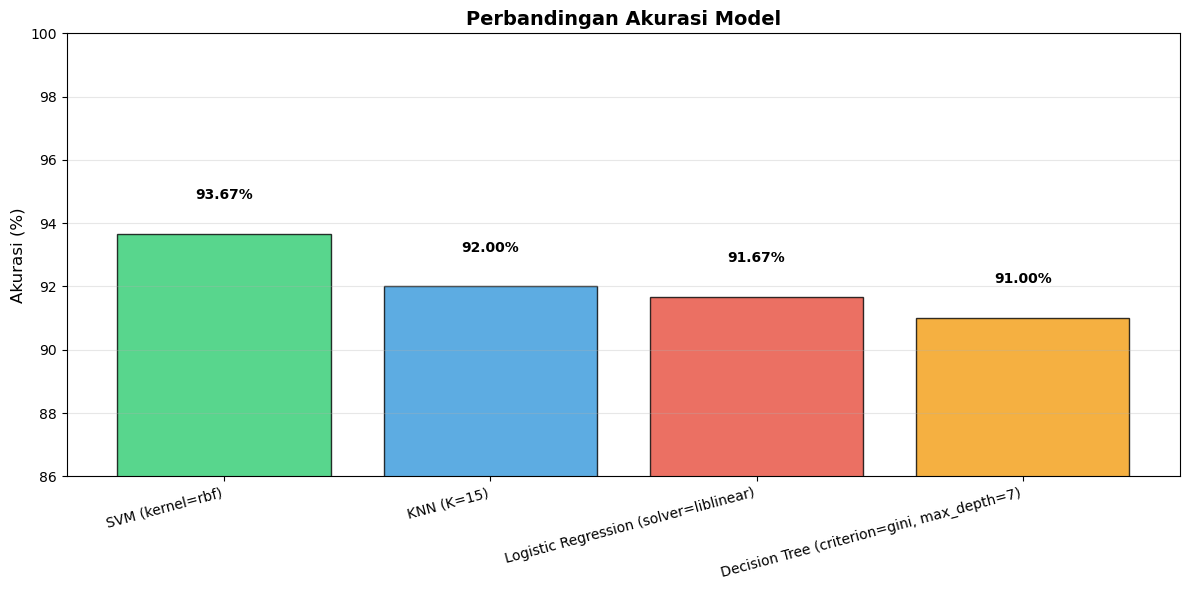


🏆 Model Terbaik: SVM (kernel=rbf)
   Akurasi: 93.67%


In [63]:
# Tabel Perbandingan Akurasi semua model
hasil = pd.DataFrame({
    'Model': [
        f'KNN (K={best_k})', 
        f'Decision Tree (criterion={best_criterion}, max_depth={best_max_depth})',
        f'SVM (kernel={best_kernel})',
        f'Logistic Regression (solver={best_solver})'
    ],
    'Akurasi (%)': [
        round(best_knn_score*100, 2),
        round(best_dt_score*100, 2),
        round(best_svm_score*100, 2),
        round(best_lr_score*100, 2)
    ]
})

hasil = hasil.sort_values('Akurasi (%)', ascending=False).reset_index(drop=True)
print('\n' + '='*70)
print('PERBANDINGAN MODEL')
print('='*70)
print(hasil.to_string(index=False))
print('='*70)

# Visualisasi
plt.figure(figsize=(12, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
bars = plt.bar(hasil['Model'], hasil['Akurasi (%)'], color=colors, edgecolor='black', alpha=0.8)

plt.ylabel('Akurasi (%)', fontsize=12)
plt.title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.ylim([min(hasil['Akurasi (%)'])-5, 100])

# Tambahin nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Model terbaik
best_model = hasil.iloc[0]['Model']
best_accuracy = hasil.iloc[0]['Akurasi (%)']
print(f'\n🏆 Model Terbaik: {best_model}')
print(f'   Akurasi: {best_accuracy}%')

## 7. Feature Importance dari Decision Tree


Feature Importance:
Item_Wishlist            0.396491
Tenure                   0.309363
Skor_Kepuasan            0.132056
Sesi_Per_Bulan           0.090855
Hari_Terakhir_Login      0.037368
Jumlah_Tiket_Komplain    0.021236
Total_Belanja_3bln       0.012631
dtype: float64


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_46160\3620976503.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


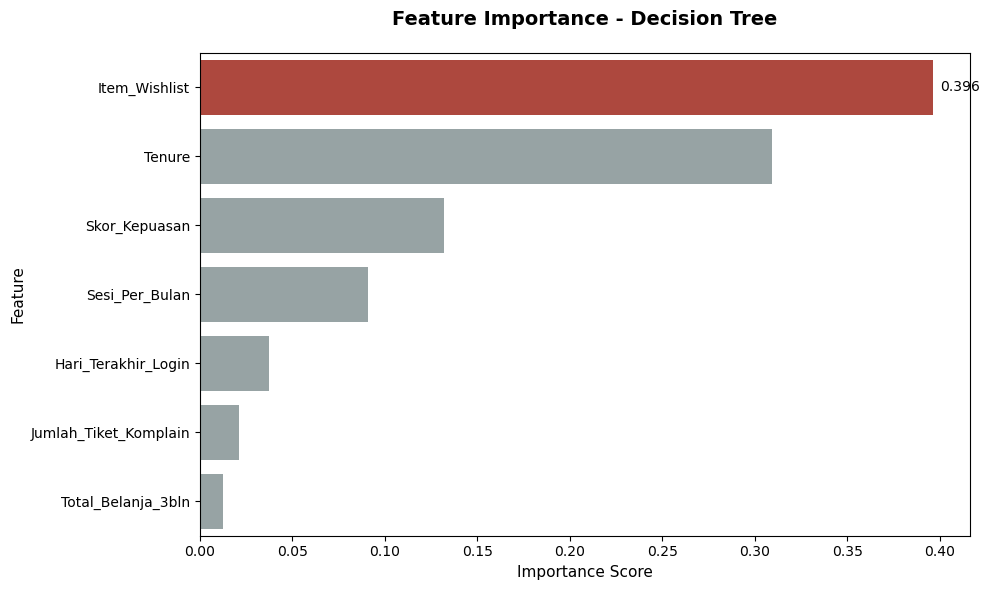


📊 Feature paling berpengaruh: Item_Wishlist
   Importance Score: 0.3965


In [64]:
# Feature Importance dari Decision Tree
importance = pd.Series(best_dt.feature_importances_, index=X.columns)
importance_sorted = importance.sort_values(ascending=False)

print('\nFeature Importance:')
print(importance_sorted)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
bar_colors = ['#c0392b'] + ['#95a5a6'] * (len(importance_sorted) - 1)

ax = sns.barplot(
    x=importance_sorted.values, 
    y=importance_sorted.index, 
    palette=bar_colors
)

# Tambahin label angka
ax.bar_label(ax.containers[0], fmt='%.3f', padding=5, fontsize=10)

ax.set_title("Feature Importance - Decision Tree", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Importance Score", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 Feature paling berpengaruh: {importance_sorted.index[0]}")
print(f"   Importance Score: {importance_sorted.values[0]:.4f}")


CLASSIFICATION REPORT & CONFUSION MATRIX

Model: SVM (kernel=rbf)
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       145
           1       0.94      0.94      0.94       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



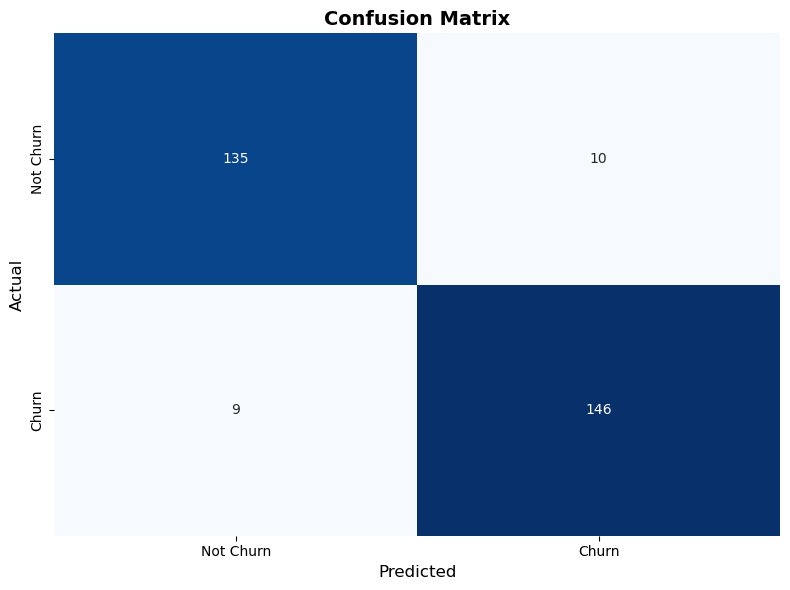

In [66]:
print("\n" + "="*60)
print(f"CLASSIFICATION REPORT & CONFUSION MATRIX")
print("="*60)

# Tentuin prediksi berdasarkan model terbaik
if 'KNN' in best_model:
    final = KNeighborsClassifier(n_neighbors=best_k)
    final.fit(X_train_scaled, y_train)
    y_pred = final.predict(X_test_scaled)
elif 'Decision Tree' in best_model:
    y_pred = best_dt.predict(X_test)
elif 'SVM' in best_model:
    final = SVC(kernel=best_kernel, random_state=42)
    final.fit(X_train_scaled, y_train)
    y_pred = final.predict(X_test_scaled)
else:  # Logistic Regression
    final = LogisticRegression(solver=best_solver, max_iter=1000, random_state=42)
    final.fit(X_train_scaled, y_train)
    y_pred = final.predict(X_test_scaled)

print(f'\nModel: {best_model}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title(f'Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()